# Exploratory Analysis: Demographics of Oscars

<table align="right">
    <tr>
        <td>
            <img src= "https://upload.wikimedia.org/wikipedia/pt/4/4c/Oscar_2020.png"/>
        </td>
    </tr>
</table>

### Info

1. Dataset: [Demographic of Oscars](https://www.kaggle.com/fmejia21/demographics-of-academy-awards-oscars-winners)
2. Goal: See how diverse is the universe of the Oscars winners
3. This analysis was made as homework for my post graduate degree program (PADS) at [Insper](https://www.insper.edu.br/pos-graduacao/programas-avancados/programa-avancado-em-data-science-e-decisao/), São Paulo, Brazil

### Simplifications/Biases:
1. Data condfidence is 100% for all points
2. All winners from the "best director" category are men. (As checked in the name column, only 3 winners were women, which is just the start of what I'm trying to show here)
3. The age is calculated at the year of the award

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# Reading the dataset
f = open("Oscars-demographics-DFE.csv", encoding='ISO-8859-1')
lines = f.readlines()
f.close()

In [3]:
# Showing the first lines
for i in range(5):
    print(lines[i])

_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold

670454353,FALSE,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1,30-Sep-1895,1,White,1,Na,1,Straight,1,1927,1,Best Director,http://www.nndb.com/people/320/000043191/,,,Two Arabian Knights,Lewis Milestone,,,,

670454354,FALSE,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1,2-Feb-1886,1,White,1,Na,1,Straight,0.6842,1930,1,Best Director,http://www.nndb.com/people/626/000042500/,,,The Divine Lady,Frank Lloyd,,,,

670454355,FALSE,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1,30-Sep-1895,1,White,1,Na,1,Straight,1,1931,0.6667,Best Director,http://www.nndb.com/people/3

In [4]:
def gender(dado):
    if dado[-2::] == 'or':
        gender = 'male'
    elif dado[-2::] == 'ss':
        gender = 'female'
    else:
        gender = 'nonbinary'
    return gender

In [5]:
def award_age(award_year, birthday):
    #print(award_year, birthday)
    birth_year = birthday.split('-')[-1][:4]
    if len(birth_year) < 4:
        if int(award_year) < 2000:
            birth_year = 1900 + int(birth_year)
        elif int(birth_year) < 14: #possibility of a winner someone under the age of 15
            birth_year = 2000 + int(birth_year)
        else:
            birth_year = 1900 + int(birth_year)
    age = int(award_year) - int(birth_year)
    #print(age)
    return age

In [6]:
def country(dado):
    if dado.count(',') >= 1:
        country = dado.split(', ')[-1]
    else:
        return 'USA'
    #print(country, len(country))
    if len(country) == 2 and country != 'UK':
        return 'USA'
    else:
        return country

In [7]:
# Data processing
# Separating data: 
# - 'unit id
# - 'birthplace' (country)
# - 'date of birth'
# - 'ethnicity'
# - 'religion'
# - 'sexual orientation'
# - 'year of award'
# - 'award'
# - 'name'

#Calculated features:
# - 'gender based on award category'
# - 'age at award'

dados = []
#for i in range(1,10):
for i in range(1,len(lines)-1):
    line_pre = lines[i].split('"')
    #print('i:',i, len(line_pre[0]))
    if len(line_pre) < 3 or len(line_pre[0]) > 41:
        line = [lines[i].split(',')[0:5],lines[i].split(',')[5],lines[i].split(',')[6:]]
    else:
        line = [line_pre[0].split(','), country(line_pre[1]),line_pre[2].split(',')]
        #print(line[2])
        dado = [int(line[0][0]), line[1], line[2][2], line[2][4], line[2][6], line[2][8], int(line[2][10]), line[2][12], gender(line[2][12]),award_age(line[2][10],line[2][2]),line[2][-5]]
        dados.append(dado)
        
print(dados[-5:])

[[670946199, 'England', '28-Dec-34', 'White', 'Na', 'Straight', 1970, 'Best Actress', 'female', 36, 'Maggie Smith'], [670946276, 'England', '7-Mar-71', 'White', 'Jewish', 'Straight', 2006, 'Best Supporting Actress', 'female', 35, 'Rachel Weisz'], [670946299, 'England', '20-Oct-56', 'White', 'Roman Catholic', 'Straight', 2009, 'Best Director', 'male', 53, 'Danny Boyle'], [670964912, 'USA', '26-Jul-22', 'White', 'Na', 'Straight', 1977, 'Best Supporting Actor', 'male', 55, 'Jason Robards'], [670964956, 'USA', '31-Aug-28', 'White', 'Na', 'Straight', 1999, 'Best Supporting Actor', 'male', 71, 'James Coburn']]


### Graph 1: Pie Chart 
Winners x Ethnicity

In [8]:
cauc = 0
afr = 0
hisp = 0
asian = 0
other = 0

for i in range(len(dados)):
    ethnicity = dados[i][3]
    
    if ethnicity == 'Black':
        afr +=1
    elif ethnicity == 'White':
        cauc +=1
    elif ethnicity == 'Asian':
        asian +=1
    elif ethnicity == 'Hispanic':
        hisp +=1
    else:
        other +=1
        print(ethnicity)
        
etnias = [cauc, afr, hisp, asian, other]

Multiracial
Middle Eastern
Multiracial


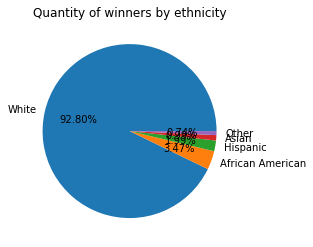

In [9]:
# Plotando o gráfico -> Vimos em sala!
# Tbm alterei o esquema de cores: 1ª classe -> verde | 2ª classe -> vermelha | 3ª classe -> amarela
plt.pie(etnias, autopct="%.2f%%", labels=["White",'African American','Hispanic','Asian', 'Other'])
plt.title("Quantity of winners by ethnicity")
plt.show()

As shown above, the award is predominantly given to white people

### Graph 2: Histogram
Age of winners at the year of the award distribution

In [10]:
faixas = []
idades = []
for i in range(0,100,10):
    faixas.append(i)
    idades.append(0)

print(faixas)

for i in range(len(dados)):
    idade = dados[i][-2]
    if idade > 0:
        j = 0
        while idade > faixas[j]:
            j +=1
        idades[j] += 1
        #print(idade, faixas[j])
print(idades)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
[0, 0, 3, 49, 124, 125, 52, 32, 15, 3]


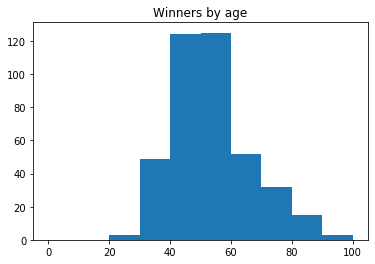

In [11]:
plt.bar(faixas, height = idades, width = 10, align = 'edge')
plt.title("Winners by age")
plt.show()

### Gráfico 3: Bar Chart
Percentage of winner's sexual orientation and religion by gende'

In [12]:
sexo = [0,0,0] #[women, men, non-binary]
religiao = [[0,0],[0,0],[0,0]] #[yes, no]
lgbtq = [[0,0],[0,0],[0,0]] #[yes, no]
for i in range(len(dados)):
    gender = dados[i][-3]
    religion = dados[i][4]
    orientation = dados[i][5]
    
    if gender == 'female':
        sexo[0] +=1
        if religion == 'Na':
            religiao[0][1] +=1
        else:
            religiao[0][0] +=1 
        if orientation == 'Straight':
            lgbtq[0][1] +=1
        else:
            lgbtq[0][0] +=1
    
    elif gender == 'male':
        sexo[1] +=1
        if religion == 'Na':
            religiao[1][1] +=1
        else:
            religiao[1][0] +=1 
        if orientation == 'Straight':
            lgbtq[1][1] +=1
        else:
            lgbtq[1][0] +=1
            
    else:
        sexo[2] +=1
        if religion == 'Na':
            religiao[2][1] +=1
        else:
            religiao[2][0] +=1 
        if orientation == 'Straight':
            lgbtq[2][1] +=1
        else:
            lgbtq[2][0] +=1
            
print(sexo)
print(religiao)
print(lgbtq)

[166, 237, 0]
[[64, 102], [89, 148], [0, 0]]
[[18, 148], [24, 213], [0, 0]]


In [13]:
import numpy as np

In [14]:
pct_female = sexo[0]/sum(sexo)
pct_male = 1 - pct_female

In [15]:
female_with_religion = religiao[0][0]/sum(religiao[0])
female_no_religion = 1 - female_with_religion
male_with_religion = religiao[1][0]/sum(religiao[1])
male_no_religion = 1 - male_with_religion

In [16]:
female_straight = lgbtq[0][1]/sum(lgbtq[0])
female_lgbtq = 1 - female_straight
male_straight = lgbtq[1][1]/sum(lgbtq[1])
male_lgbtq = 1 - male_straight

In [17]:
sx = [sexo[0],sexo[1]]
rlgn = [religiao[0][0], religiao[1][0]]
sxlt = [lgbtq[0][0],lgbtq[1][0]]

Text(1.0999999999999999, 29, '10.13%')

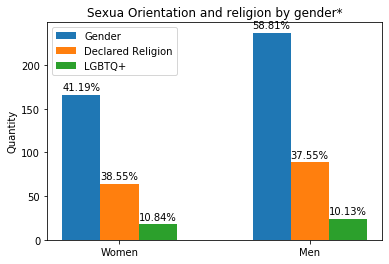

In [19]:
labels = ['Women', 'Men']

width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, sx, width, label='Gender', align = 'center')
rects2 = ax.bar(x, rlgn, width, label='Declared Religion',align = 'center')
rects3 = ax.bar(x + width, sxlt, width, label='LGBTQ+',align = 'center')

ax.set_ylabel('Quantity')
ax.set_title('Sexua Orientation and religion by gender*')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.annotate('{:.2%}'.format(pct_female),xy=(0-width-width/2, sx[0]+5))
ax.annotate('{:.2%}'.format(pct_male),xy=(1-width-width/2, sx[1]+5))
ax.annotate('{:.2%}'.format(female_with_religion),xy=(0-width/2, rlgn[0]+5))
ax.annotate('{:.2%}'.format(male_with_religion),xy=(1-width/2, rlgn[1]+5))
ax.annotate('{:.2%}'.format(female_lgbtq),xy=(0+width-width/2, sxlt[0]+5))
ax.annotate('{:.2%}'.format(male_lgbtq),xy=(1+width-width/2, sxlt[1]+5))

*Since there was no observation for non binaries, it's not included in the graph.

Surprisingly (or not) the quantity of winners of the LGBTQ+ community and that have a declared religion is roughly the same for men and women

### Gráfico 4: Bar Charte
Average age by category

In [21]:
def avg(idades):
    return sum(idades)/len(idades)

In [22]:
actress = []
director = []
actor = []
sup_actress = []
sup_actor = []

for i in range(len(dados)):
    idade = dados[i][-2]
    categoria = dados[i][7]
    name = dados[i][-1]

    if categoria == 'Best Actor':
        actor.append(idade)
    elif categoria == 'Best Actress':
        actress.append(idade)
    elif categoria == 'Best Director':
        director.append(idade)
        #print(name, i)
    elif categoria == 'Best Supporting Actress':
        sup_actress.append(idade)
    elif categoria == 'Best Supporting Actor':
        sup_actor.append(idade)
    else:
        print(categoria)
        
categorias = [actress, actor, director, sup_actress, sup_actor]

In [23]:
idades_avg = []
for cat in categorias:
    idades_avg.append(avg(cat))

In [24]:
total_avg = []
for media in idades_avg:
    total_avg.append(avg(idades_avg))

In [25]:
def rotular(valores):
    for i in range(len(valores)):
        ax.annotate('{:.0f}'.format(valores[i]),xy=(i, valores[i]+0.5))

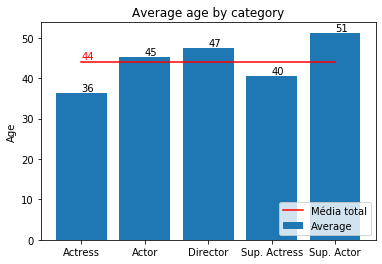

In [26]:
fig, ax = plt.subplots()
ax.bar(x = ['Actress','Actor','Director','Sup. Actress', 'Sup. Actor'], height = idades_avg, label = 'Average')
ax.plot(total_avg, color = 'red', label = 'Média total')

ax.set_ylabel('Age')
ax.set_title('Average age by category')
ax.legend(loc = 'lower right')
ax.annotate('{:.0f}'.format(avg(idades_avg)),xy=(0, avg(idades_avg)+0.5), color = 'red')
rotular(idades_avg)